In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

## Read Data

In [2]:
loans = pd.read_csv("accepted_2007_to_2018Q4.csv.gz", compression='gzip', low_memory=True)
loans.head()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300

## 資料剖析&前處理

In [3]:
loans.shape

(2260701, 151)

In [4]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [6]:
# keep the loans with status "Fully Paid" or "Charged Off."
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [7]:
loans.shape

(1345310, 151)

In [8]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [9]:
loans['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.800374
Charged Off    0.199626
Name: loan_status, dtype: float64

In [10]:
loans.isnull().sum().sort_values(ascending=False).head(100)

member_id                                     1345310
next_pymnt_d                                  1345310
orig_projected_additional_accrued_interest    1341551
hardship_start_date                           1339556
hardship_end_date                             1339556
payment_plan_start_date                       1339556
hardship_length                               1339556
hardship_dpd                                  1339556
hardship_loan_status                          1339556
hardship_last_payment_amount                  1339556
hardship_payoff_balance_amount                1339556
hardship_amount                               1339556
hardship_status                               1339556
hardship_reason                               1339556
hardship_type                                 1339556
deferral_term                                 1339556
sec_app_mths_since_last_major_derog           1338665
sec_app_revol_util                            1327008
revol_bal_joint             

In [11]:
cols_to_drop = loans.isnull().sum().sort_values(ascending=False).head(95).index
loans = loans.drop(columns=cols_to_drop)
loans.shape

(1345310, 56)

In [12]:
nulls = loans.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/loans.shape[0]*100)
nulls_percentage.head(15)

last_pymnt_d                  0.171931
revol_util                    0.063703
pub_rec_bankruptcies          0.051810
dti                           0.027800
collections_12_mths_ex_med    0.004163
chargeoff_within_12_mths      0.004163
last_credit_pull_d            0.004088
tax_liens                     0.002899
zip_code                      0.000074
inq_last_6mths                0.000074
issue_d                       0.000000
addr_state                    0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
purpose                       0.000000
dtype: float64

In [13]:
loans = loans.dropna()
loans.shape

(1341026, 56)

In [14]:
loans.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'disbursement_me

In [15]:
#remove cloumns
cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code', 'id', 'pymnt_plan', 'hardship_flag', 'issue_d', 'url', 'last_pymnt_d', 
                'last_credit_pull_d', 'zip_code', 'addr_state', 'earliest_cr_line']
loans = loans.drop(columns=cols_to_drop)
loans.shape

(1341026, 43)

In [16]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

In [17]:
#remove duplicated information.
cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 
                'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
loans = loans.drop(columns=cols_to_drop)
loans.shape

(1341026, 34)

In [18]:
loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [19]:
loans['term'].value_counts(dropna=False)

 36 months    1017398
 60 months     323628
Name: term, dtype: int64

In [20]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))
loans['term'].value_counts(normalize=True)

36    0.758671
60    0.241329
Name: term, dtype: float64

In [21]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.158525
60    0.323201
Name: loan_status, dtype: float64

In [22]:
print(sorted(loans['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [23]:
loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [24]:
loans.drop('grade', axis=1, inplace=True)

In [25]:
loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [26]:
loans = pd.get_dummies(loans, columns = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 
                                       'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)

In [27]:
loans.shape

(1341026, 83)

In [28]:
loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'last_fico_range_high', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'Source Verified',
       'Verified', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'w', 'Joint App', 'Direct

In [29]:
#  0 indicates fully paid and 1 indicates charge-off
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

In [30]:
loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'Source Verified',
       'Verified', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'w', 'Joint App', 'DirectPay', 'Y', 'cha

In [31]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

## 交叉驗證切割訓練及測試資料

In [33]:
X, y = loans.drop('charged_off', axis=1), loans['charged_off']
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index],
    y_train, y_test = y.iloc[train_index], y.iloc[test_index],

## XGBoost

In [169]:
from xgboost.sklearn import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

[23:13:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 99.45%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.995257      0.991216  0.994461       0.993237       0.994453
recall          0.997840      0.980866  0.994461       0.989353       0.994461
f1-score        0.996547      0.986014  0.994461       0.991280       0.994450
support    144894.000000  36010.000000  0.994461  180904.000000  180904.000000
_______________________________________________
Confusion Matrix: 
 [[144581    313]
 [   689  35321]]

Test Result:
Accuracy Score: 98.70%
_______________________________________________

In [63]:
from sklearn.metrics import roc_curve,auc

y_score = xgb_clf.predict_proba(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_test_pred)
roc_auc_gb = auc(fpr_gb, tpr_gb)
print(roc_auc_gb)

0.9781601788499047


In [66]:
whitout_y_loans = loans.drop('charged_off', axis=1)
feature_importance=pd.DataFrame({'feature':whitout_y_loans.columns,'feature_importance':[i for i in xgb_clf.feature_importances_]})
sort_feature_importance = feature_importance.sort_values('feature_importance',ascending=True)
sort_feature_importance.tail(10)

,feature,feature_importance
35,C3,0.002257
78,w,0.003503
79,Joint App,0.003538
0,loan_amnt,0.003562
13,total_rec_int,0.003803
81,Y,0.005295
16,last_pymnt_amnt,0.013358
1,term,0.015433
17,last_fico_range_high,0.034265
15,recoveries,0.874213


Text(0.5, 0, 'feature importance')

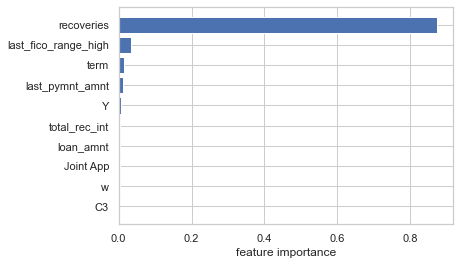

In [65]:
plt.barh(sort_feature_importance.tail(10).feature.values, sort_feature_importance.tail(10).feature_importance.values, height=0.8)
plt.xlabel("feature importance")

In [ ]:
import shap

explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_train)

C:\Users\User\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## GradientBoostingDecisionTree

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier(max_depth=7, n_estimators=200, random_state=42,learning_rate=0.1)
gradient_booster.get_params()
gradient_booster.fit(X_train,y_train)
y_train_pred = gradient_booster.predict(X_train)
y_test_pred = gradient_booster.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.51%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.995588      0.993065  0.995091       0.994326       0.995086
recall          0.998295      0.982199  0.995091       0.990247       0.995091
f1-score        0.996940      0.987602  0.995091       0.992271       0.995081
support    144894.000000  36010.000000  0.995091  180904.000000  180904.000000
_______________________________________________
Confusion Matrix: 
 [[144647    247]
 [   641  35369]]

Test Result:
Accuracy Score: 98.68%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.990037     0.973357  0.986766      0.981697      0.986720
recall         0.993479     0.959720  0.986766      0.976600      0.986766
f1-score       0.991755     0.966490  0.986766      0.979123 

In [27]:
from sklearn.metrics import roc_curve,auc

y_score = gradient_booster.predict_proba(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_test_pred)
roc_auc_gb = auc(fpr_gb, tpr_gb)
print(roc_auc_gb)

0.9765996328582213


In [54]:
whitout_y_loans = loans.drop('charged_off', axis=1)
feature_importance=pd.DataFrame({'feature':whitout_y_loans.columns,'feature_importance':[i for i in gradient_booster.feature_importances_]})
sort_feature_importance = feature_importance.sort_values('feature_importance',ascending=True)
sort_feature_importance.tail(10)

,feature,feature_importance
4,dti,0.001727
14,total_rec_late_fee,0.001983
2,int_rate,0.003958
81,Y,0.005559
0,loan_amnt,0.013192
13,total_rec_int,0.016514
1,term,0.021978
16,last_pymnt_amnt,0.099207
17,last_fico_range_high,0.140354
15,recoveries,0.686680


Text(0.5, 0, 'feature importance')

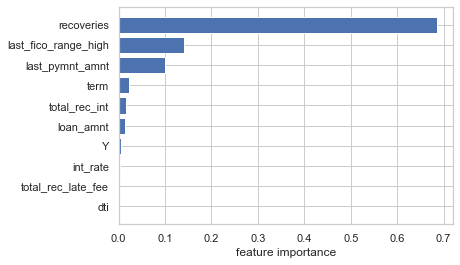

In [30]:
plt.barh(sort_feature_importance.tail(10).feature.values, sort_feature_importance.tail(10).feature_importance.values, height=0.8)
plt.xlabel("feature importance")

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 6)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
predict = model.predict(X_test)
#print(predict)
accuracy = accuracy_score(predict, y_test)
print("accuracy:", accuracy)
score = classification_report(y_test, predict)
print(score)


accuracy: 0.9545771144278608
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     16103
           1       1.00      0.77      0.87      3997

    accuracy                           0.95     20100
   macro avg       0.97      0.89      0.92     20100
weighted avg       0.96      0.95      0.95     20100



In [58]:
whitout_y_loans = loans.drop('charged_off', axis=1)
feature_importance=pd.DataFrame({'feature':whitout_y_loans.columns,'feature_importance':[i for i in model.feature_importances_]})
sort_feature_importance = feature_importance.sort_values('feature_importance',ascending=True)
sort_feature_importance.tail(10)

,feature,feature_importance
4,dti,0.003501
0,loan_amnt,0.003964
6,fico_range_high,0.004028
14,total_rec_late_fee,0.016689
2,int_rate,0.020156
1,term,0.021323
81,Y,0.048771
16,last_pymnt_amnt,0.168398
17,last_fico_range_high,0.287150
15,recoveries,0.409740


Text(0.5, 0, 'feature importance')

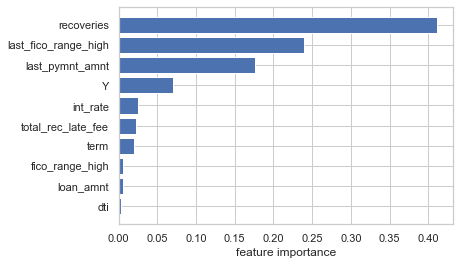

In [39]:
plt.barh(sort_feature_importance.tail(10).feature.values, sort_feature_importance.tail(10).feature_importance.values, height=0.8)
plt.xlabel("feature importance")

## Logistic Regression

In [59]:
from sklearn import preprocessing
from sklearn.linear_model  import LogisticRegression
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model=LogisticRegression()
model.fit(X_train,y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)

print(loans['Y'].value_counts())
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

0    196120
1      4884
Name: Y, dtype: int64
number of correct sample: 19488
accuracy: 0.9695522388059702


C:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)


print("Mean squared error: {}".format(mse))
print('r2 score: {}'.format(r2))
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: {}'.format(con_matrix))

Mean squared error: 0.03044776119402985
r2 score: 0.8088798232531443
number of correct sample: 19488
accuracy: 0.9695522388059702
confusion matrix: [[15875   228]
 [  384  3613]]


In [61]:
whitout_y_loans = loans.drop('charged_off', axis=1)
feature_importance=pd.DataFrame({'feature':whitout_y_loans.columns,'feature_importance':[i for i in model.coef_[0]]})
sort_feature_importance = feature_importance.sort_values('feature_importance',ascending=True)
sort_feature_importance.tail(10)

,feature,feature_importance
12,total_acc,0.113762
4,dti,0.115083
65,credit_card,0.135306
66,debt_consolidation,0.164897
6,fico_range_high,0.207438
2,int_rate,0.399551
1,term,0.842581
0,loan_amnt,1.210943
81,Y,3.991150
15,recoveries,23.158323


Text(0.5, 0, 'feature importance')

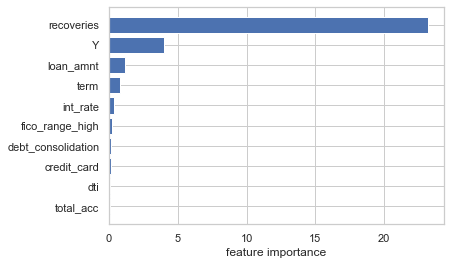

In [44]:
plt.barh(sort_feature_importance.tail(10).feature.values, sort_feature_importance.tail(10).feature_importance.values, height=0.8)
plt.xlabel("feature importance")

## Additional Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

df = pd.read_csv('accepted_and_rejected_newdata.csv')

X_features = list( df.columns )
X_features.remove( 'Y' )

X = df[X_features]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

df

,Y,Amount Requested,Risk_Score,Employment Length
0,0,1000.0,693,4
1,0,1000.0,703,0
2,0,11000.0,715,1
3,0,6000.0,698,0
4,0,1500.0,509,0
...,...,...,...,...
194785,1,13000.0,660,10
194786,1,35000.0,685,9
194787,1,14000.0,700,10
194788,1,30000.0,765,0


In [2]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)

print(df['Y'].value_counts())
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

0    98120
1    96670
Name: Y, dtype: int64
number of correct sample: 53359
accuracy: 0.9131029998117631


In [3]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)


print("Mean squared error: {}".format(mse))
print('r2 score: {}'.format(r2))
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: {}'.format(con_matrix))

Mean squared error: 0.0868970001882369
r2 score: 0.652407467564041
number of correct sample: 53359
accuracy: 0.9131029998117631
confusion matrix: [[24722  4602]
 [  476 28637]]
